Data Ghattering into sigel Data frame

Library import 

In [74]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


gathering files into a list for further assesment

In [75]:

listOfFiles=os.listdir("./OECD_Data")
len(listOfFiles)

44

In [76]:
baseDir="./OECD_Data/"
listOfSize=list()
for file in listOfFiles:
    listOfSize.append(os.path.getsize(baseDir+file))
len(listOfSize)
fileVSsizeDf=pd.DataFrame({'File_name':listOfFiles,'File_size':listOfSize})

In [77]:
fileVSsizeDf

,File_name,File_size
0,CO2 emissions from transport in tonnes per one...,6415
1,Density of road (km per one hundred sq. km).csv,5047
2,Hospitalised - rate per population.csv,10
3,Hospitalised.csv,10
4,Injured and seriously injured - rate per popul...,10
5,Injured and seriously injured.csv,10
6,Killed - rate per population.csv,2340
7,Killed - rate per vehicle.csv,10
8,Killed.csv,2637
9,Rail infrastructure maintenance.csv,12534


total data size

In [78]:
totalSize=fileVSsizeDf['File_size'].sum()
print(f"{totalSize/1000}{' KB'}")

165.387 KB


A littel bit of ghrafics for better assesment

<BarContainer object of 44 artists>

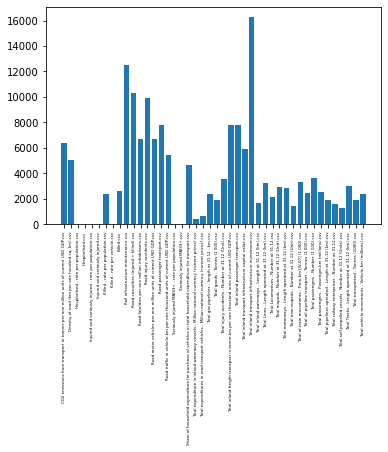

In [79]:
y=fileVSsizeDf['File_size']
x=fileVSsizeDf['File_name']

plt.xticks(fontsize=4,rotation=90)
plt.bar(x,y)

In [80]:
fileVSsizeDf.describe()

,File_size
count,44.000000
mean,3758.795455
std,3619.336227
min,10.000000
25%,1542.750000
50%,2572.500000
75%,5554.750000
max,16261.000000


It looks like there are few small files, let explore them:

In [81]:
smallFilesDf=fileVSsizeDf[fileVSsizeDf["File_size"]<=10]

In [82]:
smallFilesDf

,File_name,File_size
2,Hospitalised - rate per population.csv,10
3,Hospitalised.csv,10
4,Injured and seriously injured - rate per popul...,10
5,Injured and seriously injured.csv,10
7,Killed - rate per vehicle.csv,10
16,Seriously injured MAIS3+ - rate per population...,10
17,Seriously injured MAIS3+.csv,10


In [83]:
def readCsvFile(dirName,FileName):
    title=FileName.strip('.csv')
    df=pd.read_csv(dirName+FileName)
    return title ,df

In [84]:
smallFileName,smallFile=readCsvFile(baseDir,smallFilesDf.iloc[0,0])

In [85]:
print(smallFileName)
smallFile

Hospitalised - rate per population


,Unnamed: 0,Country


Looks like those files are emty!!! let's get rid of them

In [86]:
fileVSsizeDf=fileVSsizeDf[fileVSsizeDf["File_size"]>10]

In [87]:
fileVSsizeDf

,File_name,File_size
0,CO2 emissions from transport in tonnes per one...,6415
1,Density of road (km per one hundred sq. km).csv,5047
6,Killed - rate per population.csv,2340
8,Killed.csv,2637
9,Rail infrastructure maintenance.csv,12534
10,Road casualties (injured + killed).csv,10303
11,Road fatalities per one million inhabitants.csv,6659
12,Road injury accidents.csv,9949
13,Road motor vehicles per one million units of c...,6661
14,Road passenger transport.csv,7792


Reorgenize the index

In [88]:
fileVSsizeDf.reset_index(drop=True)

,File_name,File_size
0,CO2 emissions from transport in tonnes per one...,6415
1,Density of road (km per one hundred sq. km).csv,5047
2,Killed - rate per population.csv,2340
3,Killed.csv,2637
4,Rail infrastructure maintenance.csv,12534
5,Road casualties (injured + killed).csv,10303
6,Road fatalities per one million inhabitants.csv,6659
7,Road injury accidents.csv,9949
8,Road motor vehicles per one million units of c...,6661
9,Road passenger transport.csv,7792


A reorganization of the dataframe by ordering the files with the biggest data in ascending order will help us to assess the amount of counties
and years needed to include in the data frame

In [89]:
fileVSsizeDf.sort_values('File_size',ascending=False,inplace=True)

c:\Users\zeev_s\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [90]:
fileVSsizeDf

,File_name,File_size
27,Total inland transport infrastructure investme...,16261
9,Rail infrastructure maintenance.csv,12534
10,Road casualties (injured + killed).csv,10303
12,Road injury accidents.csv,9949
25,Total inland passenger transport.csv,7829
14,Road passenger transport.csv,7792
24,Total inland freight transport in tonne-km per...,7787
13,Road motor vehicles per one million units of c...,6661
11,Road fatalities per one million inhabitants.csv,6659
0,CO2 emissions from transport in tonnes per one...,6415


featching the total countries and years 

In [91]:
DfNameList=list()
DfList=list()
for file in fileVSsizeDf["File_name"]:
    f_name,f_df=readCsvFile(baseDir,file)
    DfNameList.append(f_name)
    DfList.append(f_df)
    

In [92]:
dataframesDf=pd.DataFrame({"DataFrame_name":DfNameList,"DataFrame":DfList})


lets see the amount of the countries populated in the biggest file

In [93]:
max=0
for i in dataframesDf.index:
    count=len(dataframesDf.iloc[i,1])
    if(count>max):
        max=count
        title=dataframesDf.iloc[i,0]
print(max)

58


we may have anothe countries which are not included in the biggest file.
now we will featch all possible counties and years from all the files

In [94]:
countryList=list()
max_year=0
min_year=2030
for i in dataframesDf.index:
    localDataFrame=dataframesDf.iloc[i,1]
    c_list=localDataFrame["Country"]
    for c in c_list:
        countryList.append(c)
    min_y=int(localDataFrame.columns[2])
    max_y=int(localDataFrame.columns[-1])
    if(min_y<min_year):
        min_year=min_y
    elif(max_y>max_year):
        max_year=max_y
    

In [95]:
print(f'the length of country list is: {len(countryList)}\n min year is: {min_year}  and max yeat is:{max_year}')

the length of country list is: 1373
 min year is: 2000  and max yeat is:2020


1373 countires in OECD are a littl bit more the shuld be....this is why there are a lot of duplicates
the solution is to convert the list to a dictionary that will ensure only uniqe keys and back to list

In [96]:
def removeDuplicatesFromList(x):
  return list(dict.fromkeys(x))

In [97]:
countryList=removeDuplicatesFromList(countryList)
len(countryList)

64

64 countries are more legith amount of countries in OECD !!!

Now we will billd our main Data frame which accomidate all the 37 data frames.

 Two first columns will duplicated 20 times as the amount of the year span 

In [98]:
DfCountryList=list()
DfYearList=list()
for i in range(21):
    for c in countryList:
        DfCountryList.append(c)
        DfYearList.append(2000+i)

In [99]:
MainDf=pd.DataFrame({'Country':DfCountryList,'Year':DfYearList})

In [100]:
MainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  1344 non-null   object
 1   Year     1344 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 21.1+ KB


Now in order to scatter all the data we will need to access each index by a littel bit of math:
year-2000+index of the country
we need to index the country list we will do that by enumirating the list into a dictionary

In [101]:
TempCountryDict=dict(enumerate(countryList,1))

In [102]:
TempCountryDict

{1: 'Albania',
 2: 'Armenia',
 3: 'Australia',
 4: 'Austria',
 5: 'Azerbaijan',
 6: 'Belarus',
 7: 'Belgium',
 8: 'Bulgaria',
 9: 'Canada',
 10: 'China',
 11: 'Croatia',
 12: 'Czech Republic',
 13: 'Denmark',
 14: 'Estonia',
 15: 'Finland',
 16: 'France',
 17: 'Georgia',
 18: 'Germany',
 19: 'Greece',
 20: 'Hungary',
 21: 'Iceland',
 22: 'India',
 23: 'Ireland',
 24: 'Italy',
 25: 'Japan',
 26: 'Korea',
 27: 'Latvia',
 28: 'Lithuania',
 29: 'Luxembourg',
 30: 'Malta',
 31: 'Mexico',
 32: 'Moldova',
 33: 'Montenegro, Republic of',
 34: 'Netherlands',
 35: 'New Zealand',
 36: 'Norway',
 37: 'Poland',
 38: 'Portugal',
 39: 'Romania',
 40: 'Russian Federation',
 41: 'Serbia, Republic of',
 42: 'Slovak Republic',
 43: 'Slovenia',
 44: 'Spain',
 45: 'Sweden',
 46: 'Switzerland',
 47: 'Turkey',
 48: 'United Kingdom',
 49: 'United States',
 50: 'Chile',
 51: 'Argentina',
 52: 'Bosnia-Herzegovina',
 53: 'Israel',
 54: 'Kazakhstan',
 55: 'Liechtenstein',
 56: 'North Macedonia',
 57: 'Ukraine',
 

It won't work correctly!!! we need to swap bettween the key and the values of the dictionary

In [103]:
CountryDict = dict([(value, key) for key, value in TempCountryDict.items()])

In [104]:
CountryDict

{'Albania': 1,
 'Armenia': 2,
 'Australia': 3,
 'Austria': 4,
 'Azerbaijan': 5,
 'Belarus': 6,
 'Belgium': 7,
 'Bulgaria': 8,
 'Canada': 9,
 'China': 10,
 'Croatia': 11,
 'Czech Republic': 12,
 'Denmark': 13,
 'Estonia': 14,
 'Finland': 15,
 'France': 16,
 'Georgia': 17,
 'Germany': 18,
 'Greece': 19,
 'Hungary': 20,
 'Iceland': 21,
 'India': 22,
 'Ireland': 23,
 'Italy': 24,
 'Japan': 25,
 'Korea': 26,
 'Latvia': 27,
 'Lithuania': 28,
 'Luxembourg': 29,
 'Malta': 30,
 'Mexico': 31,
 'Moldova': 32,
 'Montenegro, Republic of': 33,
 'Netherlands': 34,
 'New Zealand': 35,
 'Norway': 36,
 'Poland': 37,
 'Portugal': 38,
 'Romania': 39,
 'Russian Federation': 40,
 'Serbia, Republic of': 41,
 'Slovak Republic': 42,
 'Slovenia': 43,
 'Spain': 44,
 'Sweden': 45,
 'Switzerland': 46,
 'Turkey': 47,
 'United Kingdom': 48,
 'United States': 49,
 'Chile': 50,
 'Argentina': 51,
 'Bosnia-Herzegovina': 52,
 'Israel': 53,
 'Kazakhstan': 54,
 'Liechtenstein': 55,
 'North Macedonia': 56,
 'Ukraine': 57,
 

now we are good to proceed and continue to accomidate the rest of the data into the MainDf:
one more thing we need to do is add a column of NaN values 

In [105]:
nanList=list()
for i in MainDf.index:
    nanList.append(np.nan)

In [106]:
for ind in dataframesDf.index:
    fileName=dataframesDf.iloc[ind,0]
    MainDf[fileName]=nanList
    Df=dataframesDf.iloc[ind,1]
    c_list=Df["Country"]
    y_list=Df.columns
    y_list=y_list.delete(0)
    y_list=y_list.delete(0)
    for year in y_list:
        i=0
        for country in c_list:
            MainDf.loc[(((int(year)-2000)*64)-1)+CountryDict[country],fileName]=Df.loc[i,year]
            i+=1

Here is the Data Frame:
Lets look at the result

In [107]:
MainDf

,Country,Year,Total inland transport infrastructure investment,Rail infrastructure maintenance,Road casualties (injured + killed),Road injury accident,Total inland passenger transport,Road passenger transport,Total inland freight transport in tonne-km per one thousand units of current USD GDP,Road motor vehicles per one million units of current USD GDP,...,Total Locomotives - Number at 31.12,Total pipelines operated - Length at 31.12 (km),Total transported - Tonnes (1000),Total goods - Tonnes (1 000),Total inland waterways - Length at 31.12 (km),Total railway enterprises - Number at 31.12,Total new mopeds - Number at 31.12 (Unit),Total self-propelled vessels - Number at 31.12 (Units),Total expenditures in road transport vehicles - Million national currency (current prices),Total expenditure in inland waterway vessels - Million national currency (current prices)
0,Albania,2000,110 421 157,3 838 572,620,428,5 424,(E) 5 299,630.5,..,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Armenia,2000,..,..,1 377,937,1 484,1 437,..,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Australia,2000,4 111 727 074,NaN,28 591,NaN,268 358,256 806,694.4,..,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Austria,2000,1 674 000 000,508 000 000,55 905,42 126,NaN,NaN,221.8,500.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Azerbaijan,2000,35 096 212,..,2 199,1 987,9 646,9 153,3 035.2,41.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,"""Serbia, Republic of""",2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1340,Colombia,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1341,Serbia,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1342,United Kingdom,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
MainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 39 columns):
 #   Column                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                --------------  ----- 
 0   Country                                                                                               1344 non-null   object
 1   Year                                                                                                  1344 non-null   int64 
 2   Total inland transport infrastructure investment                                                      1029 non-null   object
 3   Rail infrastructure maintenance                                                                       882 non-null    object
 4   Road casualties (injured + killed)                                                                    1218 n

In [109]:
MainDf.isna().sum()

Country                                                                                                    0
Year                                                                                                       0
Total inland transport infrastructure investment                                                         315
Rail infrastructure maintenance                                                                          462
Road casualties (injured + killed)                                                                       126
Road injury accident                                                                                     147
Total inland passenger transport                                                                         504
Road passenger transport                                                                                 504
Total inland freight transport in tonne-km per one thousand units of current USD GDP                     273
Road motor vehicles

In [110]:
MainDf.to_csv('./DataFrames/MainDataFrame_raw.csv')